# k-Nearest Neighbors

O algoritmo k-Nearest Neighbors é um algoritmo não-paramétrico, isto é, não supõe nada a priori da distribuição dos dados.... utilizado tanto para as tarefas de regressão quanto para classificação.

In [1]:
# Processamento dos dados
import numpy  as np
import pandas as pd

In [2]:
# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn           as sns
%matplotlib inline

In [3]:
# Seleção dos modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

In [4]:
# Armazenamento externo de arquivos
from sklearn.externals import joblib

In [5]:
# Métricas de avaliação
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

## Carregamento dos datasets balanceados

In [6]:
# Conjuntos de treinamento
# Conjunto 1
conjunto1_train        = pd.read_csv('Data/datasets-balanceados/train_data_b_1.csv')
conjunto1_train_target = pd.read_csv('Data/datasets-balanceados/train_target_b_1.csv')

# Conjunto 2
conjunto2_train        = pd.read_csv('Data/datasets-balanceados/train_data_b_2.csv')
conjunto2_train_target = pd.read_csv('Data/datasets-balanceados/train_target_b_2.csv')

# Conjunto 3
conjunto3_train        = pd.read_csv('Data/datasets-balanceados/train_data_b_3.csv')
conjunto3_train_target = pd.read_csv('Data/datasets-balanceados/train_target_b_3.csv')

# Conjunto 4
conjunto4_train        = pd.read_csv('Data/datasets-balanceados/train_data_b_4.csv')
conjunto4_train_target = pd.read_csv('Data/datasets-balanceados/train_target_b_4.csv')

In [7]:
# Conjuntos de teste
# Conjunto 1
conjunto1_test        = pd.read_csv('Data/datasets-balanceados/test_data_b_1.csv')
conjunto1_test_target = pd.read_csv('Data/datasets-balanceados/test_target_b_1.csv')

# Conjunto 2
conjunto2_test        = pd.read_csv('Data/datasets-balanceados/test_data_b_2.csv')
conjunto2_test_target = pd.read_csv('Data/datasets-balanceados/test_target_b_2.csv')

# Conjunto 3
conjunto3_test        = pd.read_csv('Data/datasets-balanceados/test_data_b_3.csv')
conjunto3_test_target = pd.read_csv('Data/datasets-balanceados/test_target_b_3.csv')

# Conjunto 4
conjunto4_test        = pd.read_csv('Data/datasets-balanceados/test_data_b_4.csv')
conjunto4_test_target = pd.read_csv('Data/datasets-balanceados/test_target_b_4.csv')

## Carregamento dos datasets desbalanceados

In [8]:
# Leitura dos Datasets desbalanceados

# Conjuntos de treinamento

# Conjunto 1
conjunto1_train_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/train_data_1.csv')
conjunto1_train_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/train_target_1.csv')

# Conjunto 2
conjunto2_train_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/train_data_2.csv')
conjunto2_train_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/train_target_2.csv')

# Conjunto 3
conjunto3_train_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/train_data_3.csv')
conjunto3_train_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/train_target_3.csv')

# Conjunto 4
conjunto4_train_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/train_data_4.csv')
conjunto4_train_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/train_target_4.csv')

In [9]:
# Conjuntos de teste
# Conjunto 1
conjunto1_test_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/test_data_1.csv')
conjunto1_test_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/test_target_1.csv')

# Conjunto 2
conjunto2_test_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/test_data_2.csv')
conjunto2_test_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/test_target_2.csv')

# Conjunto 3
conjunto3_test_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/test_data_3.csv')
conjunto3_test_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/test_target_3.csv')

# Conjunto 4
conjunto4_test_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/test_data_4.csv')
conjunto4_test_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/test_target_4.csv')

## Pré-processamento dos dados

### Remoção de colunas inúteis

In [10]:
# Lista de csvs
df_data_balanceado        = [conjunto1_train, conjunto2_train ,conjunto3_train ,conjunto4_train,
                               conjunto1_test, conjunto2_test  ,conjunto3_test  ,conjunto4_test]

df_target_balanceado      = [conjunto1_train_target, conjunto2_train_target, conjunto3_train_target, conjunto4_train_target,
                              conjunto1_test_target, conjunto2_test_target , conjunto3_test_target , conjunto4_test_target]

df_data_desbalanceado     = [conjunto1_train_desbalanceado, conjunto2_train_desbalanceado, conjunto3_train_desbalanceado, conjunto4_train_desbalanceado,
                              conjunto1_test_desbalanceado,  conjunto2_test_desbalanceado,  conjunto3_test_desbalanceado, conjunto4_test_desbalanceado]

df_target_desbalanceado   = [conjunto1_train_target_desbalanceado, conjunto2_train_target_desbalanceado, conjunto3_train_target_desbalanceado, conjunto4_train_target_desbalanceado,
                              conjunto1_test_target_desbalanceado,  conjunto2_test_target_desbalanceado,  conjunto3_test_target_desbalanceado, conjunto4_test_target_desbalanceado]

In [11]:
# Remoção das colunas ids
for df_index in range(0,8):
    # Dataset balanceado
    df_data_balanceado[df_index].drop('id',axis=1,inplace=True)
    df_target_balanceado[df_index].drop('id',axis=1,inplace=True)
    
    # Dataset desbalanceado
    df_data_desbalanceado[df_index].drop('id',axis=1,inplace=True)
    df_target_desbalanceado[df_index].drop('id',axis=1,inplace=True)

In [12]:
# Transformação das features categóricas em dummy variables, utilizando get_dummies

def get_dummies_features(df):
    ''' Função utilizada para a codificação de features categóricas de um dataframe em features binárias'''
    output = pd.DataFrame(index = df.index)

    # Verifica cada feature, transformando somente as features categóricas/object
    for col, col_data in df.iteritems():

        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        output = output.join(col_data)
    
    return output

In [13]:
# Convertendo as features presentes no dataframes em dummies :

# Datasets balanceados
# Conjunto de treinamento
conjunto1_train = get_dummies_features(conjunto1_train)
conjunto2_train = get_dummies_features(conjunto2_train)
conjunto3_train = get_dummies_features(conjunto3_train)
conjunto4_train = get_dummies_features(conjunto4_train)

# Conjunto de teste
conjunto1_test = get_dummies_features(conjunto1_test)
conjunto2_test = get_dummies_features(conjunto2_test) 
conjunto3_test = get_dummies_features(conjunto3_test)
conjunto4_test = get_dummies_features(conjunto4_test)

# Datasets desbalanceados
conjunto1_train_desbalanceado = get_dummies_features(conjunto1_train_desbalanceado)
conjunto2_train_desbalanceado = get_dummies_features(conjunto2_train_desbalanceado)
conjunto3_train_desbalanceado = get_dummies_features(conjunto3_train_desbalanceado)
conjunto4_train_desbalanceado = get_dummies_features(conjunto4_train_desbalanceado)

# Conjunto de teste
conjunto1_test_desbalanceado = get_dummies_features(conjunto1_test_desbalanceado)
conjunto2_test_desbalanceado = get_dummies_features(conjunto2_test_desbalanceado) 
conjunto3_test_desbalanceado = get_dummies_features(conjunto3_test_desbalanceado)
conjunto4_test_desbalanceado = get_dummies_features(conjunto4_test_desbalanceado)

## Treinamento

- 4 Cenários para cada estratégia: 
    -
    -
    -
    -
- Métrica utilizada para os datasets balanceados: acurácia
- Métrica utilizada para os datasets desbalanceados: F-Score e ROC AUC

<div align="center">
No algoritmo k-NN, temos como hiperparâmetro a quantidade k de vizinhos próximos que serão utilizados para a classificação das instâncias do dataset. Primeiramente, devemos realizar uma busca pelo melhor parâmetro, e após esse processo, realizar o treinamento do modelo para o valor k ótimo. Abaixo, os 4 cenários são verificados.
</div>

In [14]:
# importanto o classificador
from sklearn.neighbors import KNeighborsClassifier as KNN
clf_knn = KNN()

### Cenários para os datasets balanceados

In [15]:
# Teste base: Verificando o funcionamento correto do modelo para as configurações padrões: K = 5
clf_knn.fit(conjunto1_train,conjunto1_train_target.earnings)
prediction_conjunto1 = clf_knn.predict(conjunto1_test)
print('Acurácia para o conjunto 1: {:.2f}'.format(accuracy_score(conjunto1_test_target.earnings,prediction_conjunto1,normalize=True)))

clf_knn.fit(conjunto2_train,conjunto2_train_target.earnings)
prediction_conjunto2 = clf_knn.predict(conjunto2_test)
print('Acurácia para o conjunto 2: {:.2f}'.format(accuracy_score(conjunto2_test_target.earnings,prediction_conjunto2,normalize=True)))

clf_knn.fit(conjunto3_train,conjunto3_train_target.earnings)
prediction_conjunto3 = clf_knn.predict(conjunto3_test)
print('Acurácia para o conjunto 3: {:.2f}'.format(accuracy_score(conjunto3_test_target.earnings,prediction_conjunto3,normalize=True)))

clf_knn.fit(conjunto4_train,conjunto4_train_target.earnings)
prediction_conjunto4 = clf_knn.predict(conjunto4_test)
print('Acurácia para o conjunto 4: {:.2f}'.format(accuracy_score(conjunto4_test_target.earnings,prediction_conjunto4,normalize=True)))

Acurácia para o conjunto 1: 0.80
Acurácia para o conjunto 2: 0.79
Acurácia para o conjunto 3: 0.80
Acurácia para o conjunto 4: 0.79


Fases de treinamento e teste: O algoritmo k-NN na fase de treinamento apenas armazena em memória o conjunto de treinamento! 

In [16]:
def validation_graph_acc(model,X,y,hyperparameter,grid_search,k_folds,score,jobs=1):
    ''' Cria a curva de validação, para busca do hiperparâmetro ótimo'''

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    scores_treino, scores_validacao = validation_curve(model,
                                                       X=X,
                                                       y=y,
                                                       param_name=hyperparameter,
                                                       param_range=grid_search,
                                                       cv=k_folds,
                                                       scoring=score,
                                                       n_jobs=jobs)
    
    # Estatísticas do treino
    test_scores_mean  = np.mean(scores_validacao, axis=1)
    test_scores_std   = np.std (scores_validacao, axis=1)

    # Estilo do sns
    sns.set_style('whitegrid')

    # Parâmetros
    param_range = grid_search
    lw = 2

    # Ajuste dos subplots
    plt.figure(figsize=(30,8))
    plt.title('Acurácia para k-vizinhos ',fontsize=20)
    plt.xlabel('Quantidade de k-vizinhos',fontsize=20)
    plt.ylabel('Acurácia',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(True)

    plt.plot(param_range, test_scores_mean, label="Acurácia na validação cruzada",color="navy", lw=lw)
    plt.fill_between(param_range, (test_scores_mean - test_scores_std),(test_scores_mean + test_scores_std), alpha=0.2,color="navy", lw=lw)
    plt.show()

In [17]:
def validation_graph_roc(model,X,y,hyperparameter,grid_search,k_folds,score,jobs=1):
    ''' Cria a curva de validação, para busca do hiperparâmetro ótimo'''

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    scores_treino, scores_validacao = validation_curve(model,
                                                       X=X,
                                                       y=y,
                                                       param_name=hyperparameter,
                                                       param_range=grid_search,
                                                       cv=k_folds,
                                                       scoring=score,
                                                       n_jobs=jobs)
    
    # Estatísticas do treino
    test_scores_mean  = np.mean(scores_validacao, axis=1)
    test_scores_std   = np.std (scores_validacao, axis=1)

    # Estilo do sns
    sns.set_style('whitegrid')

    # Parâmetros
    param_range = grid_search
    lw = 2

    # Ajuste dos subplots
    plt.figure(figsize=(30,8))
    plt.title('ROC AUC para k-vizinhos ',fontsize=20)
    plt.xlabel('Quantidade de k-vizinhos',fontsize=20)
    plt.ylabel('ROC AUC',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(True)

    plt.plot(param_range, test_scores_mean, label="ROC AUC na validação cruzada",color="navy", lw=lw)
    plt.fill_between(param_range, (test_scores_mean - test_scores_std),(test_scores_mean + test_scores_std), alpha=0.2,color="navy", lw=lw)
    plt.show()

In [18]:
def validation_graph_f1(model,X,y,hyperparameter,grid_search,k_folds,score,jobs=1):
    ''' Cria a curva de validação, para busca do hiperparâmetro ótimo'''

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    scores_treino, scores_validacao = validation_curve(model,
                                                       X=X,
                                                       y=y,
                                                       param_name=hyperparameter,
                                                       param_range=grid_search,
                                                       cv=k_folds,
                                                       scoring=score,
                                                       n_jobs=jobs)
    
    # Estatísticas do treino
    test_scores_mean  = np.mean(scores_validacao, axis=1)
    test_scores_std   = np.std (scores_validacao, axis=1)

    # Estilo do sns
    sns.set_style('whitegrid')

    # Parâmetros
    param_range = grid_search
    lw = 2

    # Ajuste dos subplots
    plt.figure(figsize=(30,8))
    plt.title('F1-score para k-vizinhos ',fontsize=20)
    plt.xlabel('Quantidade de k-vizinhos',fontsize=20)
    plt.ylabel('F1-score',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(True)

    plt.plot(param_range, test_scores_mean, label="Validação cruzada",color="navy", lw=lw)
    plt.fill_between(param_range, (test_scores_mean - test_scores_std),(test_scores_mean + test_scores_std), alpha=0.2,color="navy", lw=lw)
    plt.show()

### Dataset 1

O dataset 1 balanceado possui

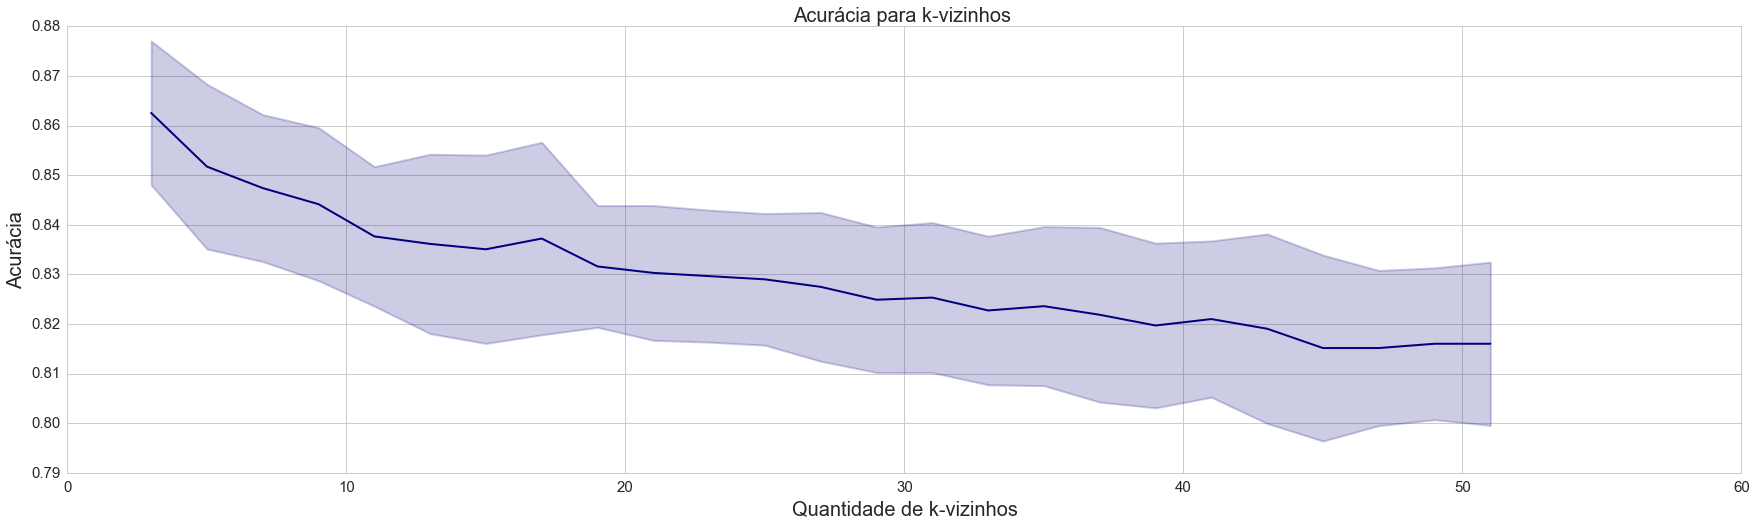

In [19]:
# Busca do melhor hiperparâmetro
validation_graph_acc(model=KNN(),X=conjunto1_train,y=conjunto1_train_target.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='accuracy',jobs=-1)

In [20]:
# Busca do melhor parâmetro utilizando gridSearchCV
cross_val_bal_1 = cross_val_score(KNN(n_neighbors=3),conjunto1_test,conjunto1_test_target.earnings,cv=10,scoring='accuracy')
print(cross_val_bal_1)

[ 0.85087719  0.86403509  0.88157895  0.88157895  0.83628319  0.80973451
  0.79646018  0.84513274  0.86283186  0.89380531]


### Dataset 2

O dataset 2 balanceado possui

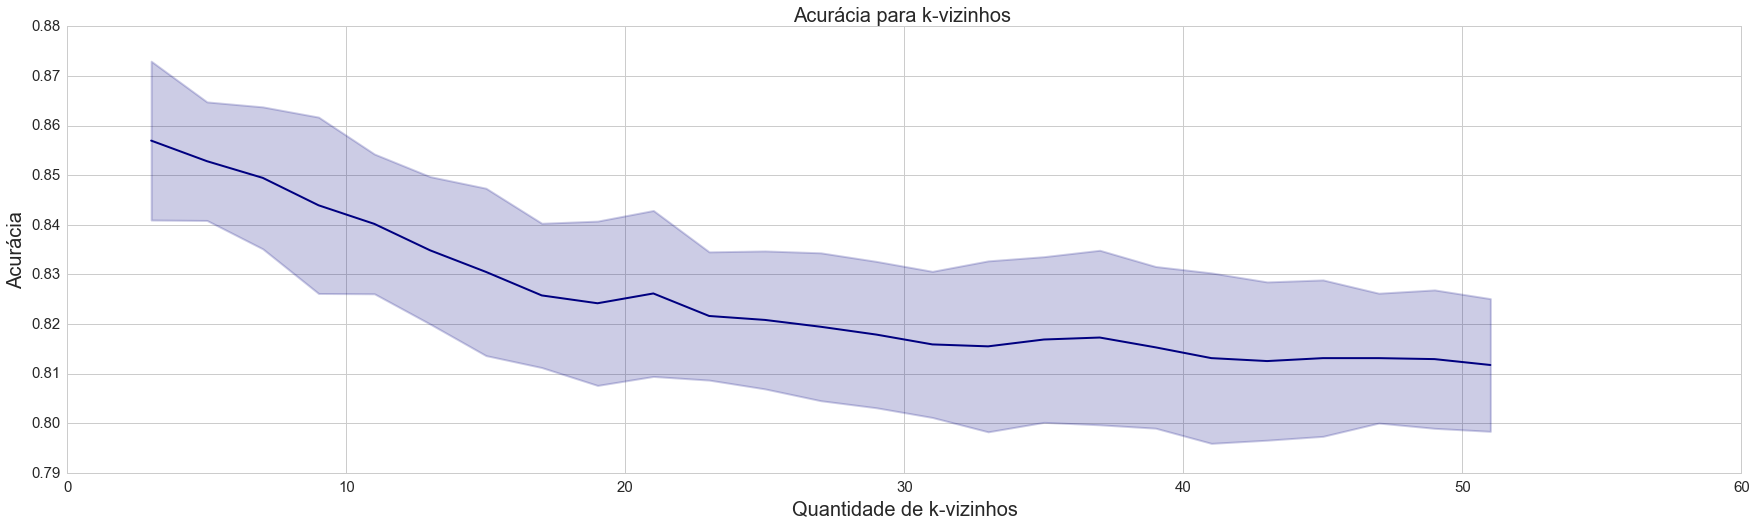

In [21]:
# Busca do melhor hiperparâmetro
validation_graph_acc(model=KNN(),X=conjunto2_train,y=conjunto2_train_target.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='accuracy',jobs=-1)

In [22]:
# acurácia no conjunto de teste
cross_val_bal_2 = cross_val_score(KNN(n_neighbors=3),conjunto2_test,conjunto2_test_target.earnings,cv=10,scoring='accuracy')
print(cross_val_bal_2)

[ 0.89837398  0.85772358  0.87398374  0.87398374  0.8852459   0.8442623
  0.88114754  0.81147541  0.84836066  0.88934426]


### Dataset 3

O dataset 3 balanceado possui

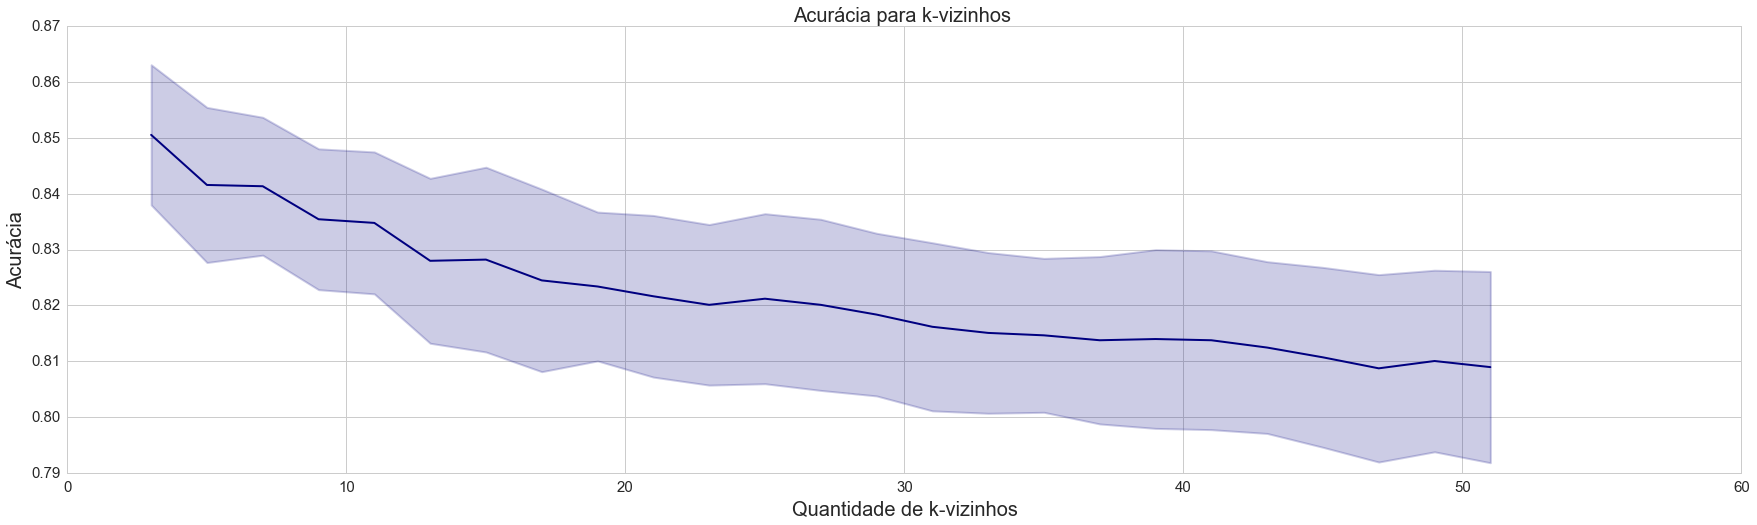

In [23]:
# Busca do melhor hiperparâmetro
validation_graph_acc(model=KNN(),X=conjunto3_train,y=conjunto3_train_target.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='accuracy',jobs=-1)

In [24]:
# acurácia no conjunto de teste
cross_val_bal_3 = cross_val_score(KNN(n_neighbors=3),conjunto3_test,conjunto3_test_target.earnings,cv=10,scoring='accuracy')
print(cross_val_bal_3)

[ 0.90517241  0.86637931  0.89655172  0.88793103  0.87068966  0.90086207
  0.87068966  0.89224138  0.89655172  0.84913793]


### Dataset 4

O dataset 4 balanceado possui

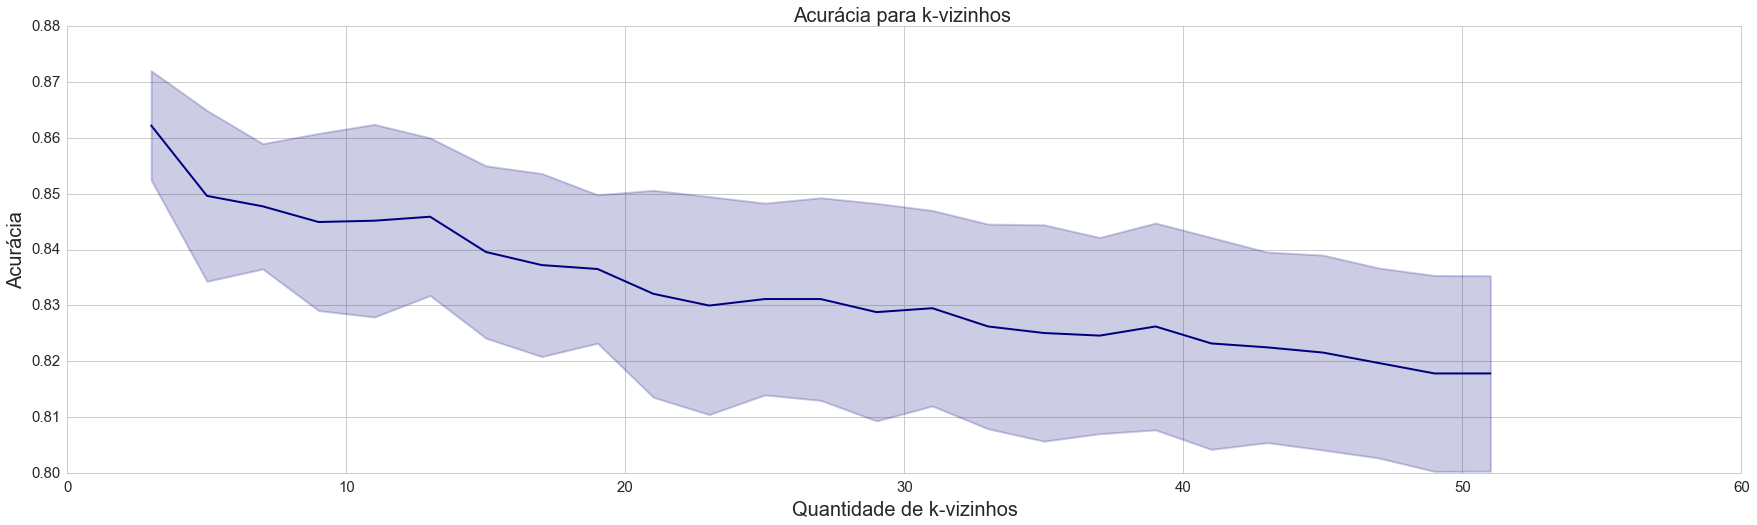

In [25]:
# Busca do melhor hiperparâmetro
validation_graph_acc(model=KNN(),X=conjunto4_train,y=conjunto4_train_target.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='accuracy',jobs=-1)

In [26]:
# acurácia no conjunto de teste
cross_val_bal_4 = cross_val_score(KNN(n_neighbors=3),conjunto4_test,conjunto4_test_target.earnings,cv=10,scoring='accuracy')
print(cross_val_bal_4)

[ 0.81775701  0.85514019  0.86915888  0.85046729  0.8411215   0.86915888
  0.85981308  0.85046729  0.85981308  0.88785047]


### Avaliação dos modelos para cada cenário

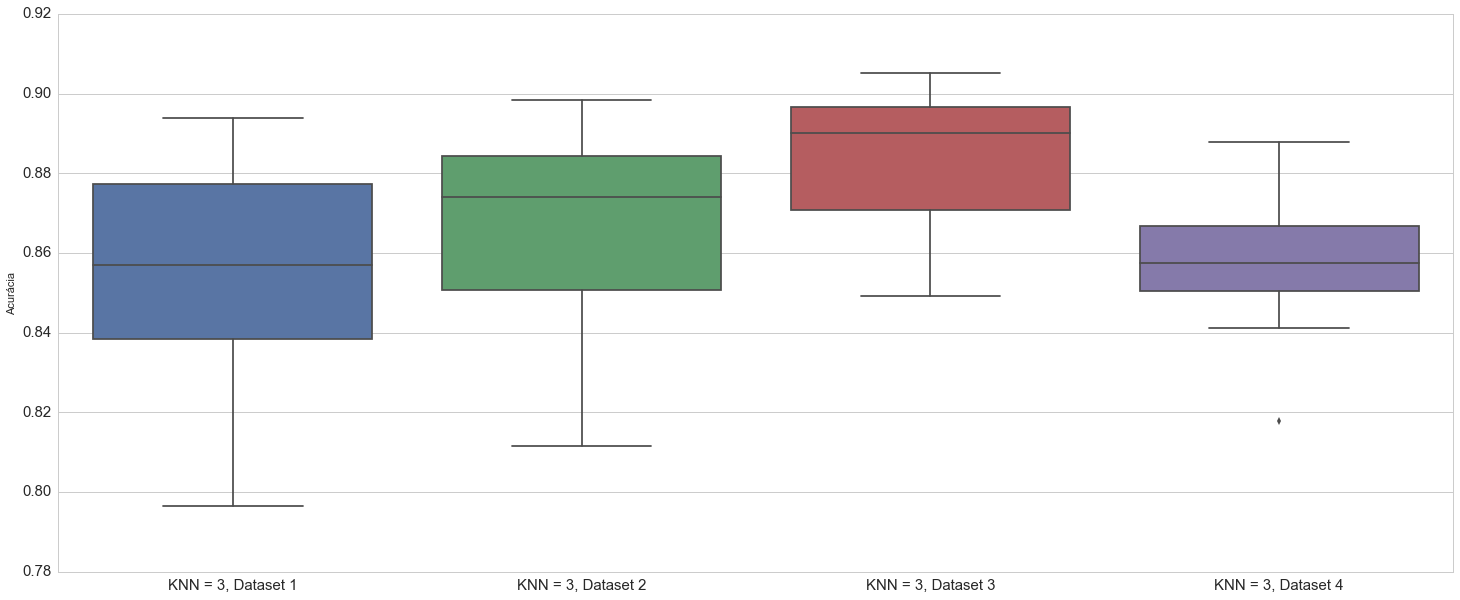

In [27]:
modelos_balanceados = [cross_val_bal_1, cross_val_bal_2, cross_val_bal_3, cross_val_bal_4]
labels = ['KNN = 3, Dataset 1', 'KNN = 3, Dataset 2', 'KNN = 3, Dataset 3', 'KNN = 3, Dataset 4']
plt.figure(figsize=(25,10))
sns.boxplot(data=modelos_balanceados)
plt.xticks(list(range(0,4)),labels,fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Acurácia')
plt.show()

Falar sobre acurácia e outliers!!! Com outliers, pontos distantes são difíceis de predizer, assim o método 3 foi bom! Escrever mais depois sobre...

### Cenários para os datasets desbalanceado

In [28]:
# Teste base: Verificando o funcionamento correto do modelo para as configurações padrões: K = 5
clf_knn.fit(conjunto1_train_desbalanceado,conjunto1_train_target_desbalanceado.earnings)
prediction_conjunto1 = clf_knn.predict(conjunto1_test_desbalanceado)
print('F1 para o conjunto 1: {:.2f}'.format(f1_score(conjunto1_test_target_desbalanceado.earnings,prediction_conjunto1)))
print('ROC AUC para o conjunto 1: {:.2f}'.format(roc_auc_score(conjunto1_test_target_desbalanceado.earnings,prediction_conjunto1)))
print()
clf_knn.fit(conjunto2_train_desbalanceado,conjunto2_train_target_desbalanceado.earnings)
prediction_conjunto2 = clf_knn.predict(conjunto2_test_desbalanceado)
print('F1 para o conjunto 2: {:.2f}'.format(f1_score(conjunto2_test_target_desbalanceado.earnings,prediction_conjunto2)))
print('ROC AUC para o conjunto 2: {:.2f}'.format(roc_auc_score(conjunto2_test_target_desbalanceado.earnings,prediction_conjunto2)))
print()
clf_knn.fit(conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings)
prediction_conjunto3 = clf_knn.predict(conjunto3_test_desbalanceado)
print('F1 para o conjunto 3: {:.2f}'.format(f1_score(conjunto3_test_target_desbalanceado.earnings,prediction_conjunto3)))
print('ROC AUC para o conjunto 3: {:.2f}'.format(roc_auc_score(conjunto3_test_target_desbalanceado.earnings,prediction_conjunto3)))
print()
clf_knn.fit(conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings)
prediction_conjunto4 = clf_knn.predict(conjunto4_test_desbalanceado)
print('F1 para o conjunto 4: {:.2f}'.format(f1_score(conjunto4_test_target_desbalanceado.earnings,prediction_conjunto4)))
print('ROC AUC para o conjunto 4: {:.2f}'.format(roc_auc_score(conjunto4_test_target_desbalanceado.earnings,prediction_conjunto4)))

F1 para o conjunto 1: 0.61
ROC AUC para o conjunto 1: 0.74

F1 para o conjunto 2: 0.56
ROC AUC para o conjunto 2: 0.70

F1 para o conjunto 3: 0.61
ROC AUC para o conjunto 3: 0.76

F1 para o conjunto 4: 0.58
ROC AUC para o conjunto 4: 0.73


Fases de treinamento e teste: O algoritmo k-NN na fase de treinamento apenas armazena em memória o conjunto de treinamento! 

### Dataset 1

O dataset 1 balanceado possui

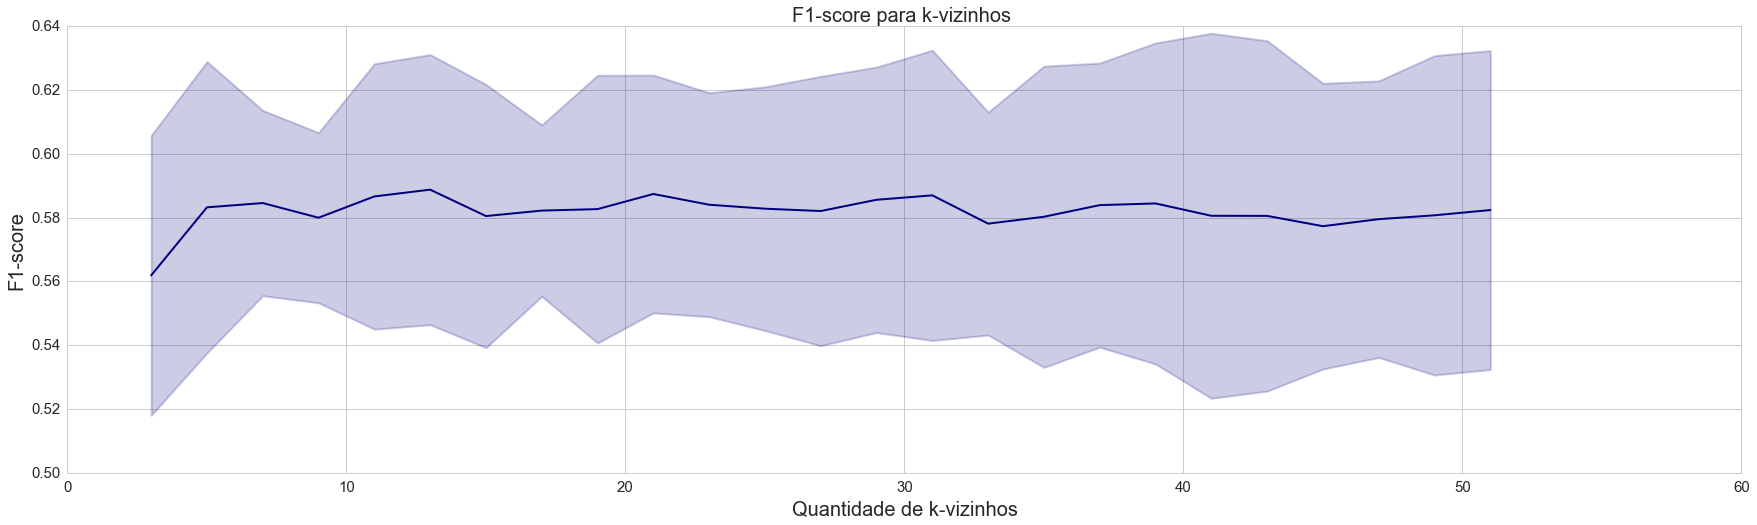

In [30]:
# Busca do melhor hiperparâmetro
validation_graph_f1(model=KNN(),X=conjunto1_train_desbalanceado,y=conjunto1_train_target_desbalanceado.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='f1',jobs=-1)

In [33]:
# Busca do melhor parâmetro utilizando gridSearchCV
cross_val_desbal_f1_1 = cross_val_score(KNN(n_neighbors=5),conjunto1_test_desbalanceado,conjunto1_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_1)


[ 0.67647059  0.43076923  0.53731343  0.60273973  0.50793651  0.63333333
  0.58461538  0.61538462  0.50793651  0.58064516]


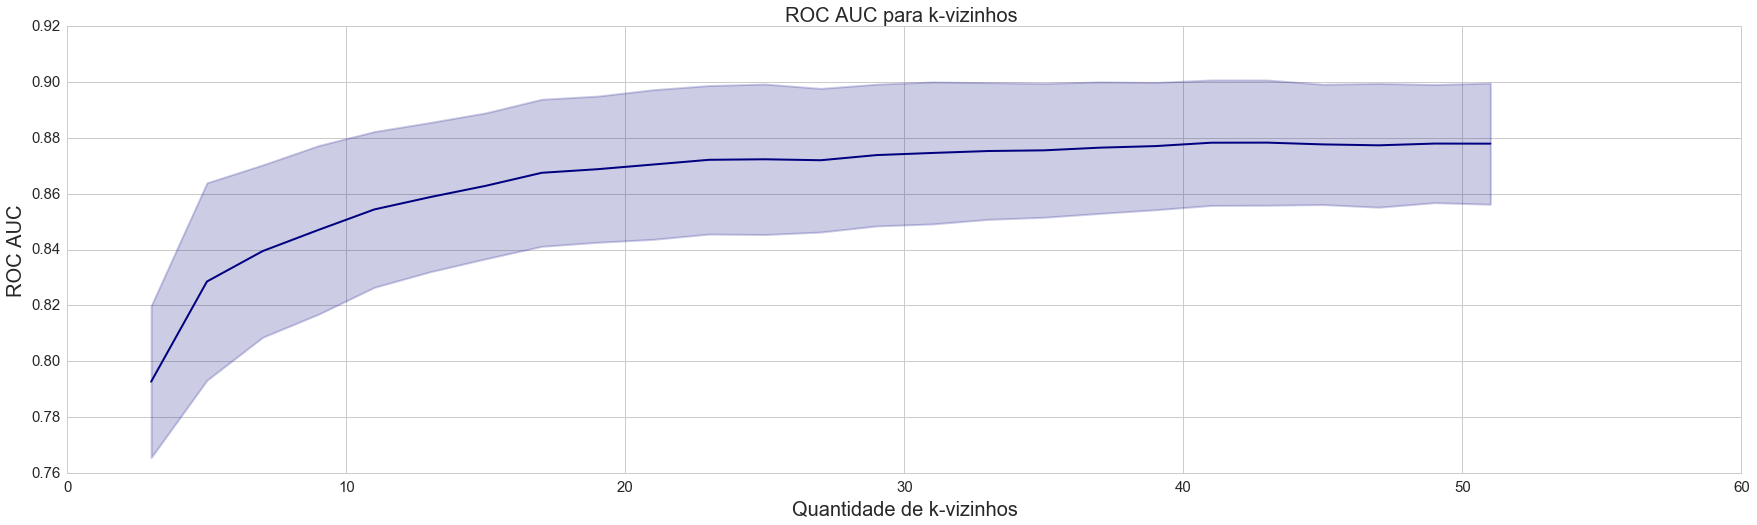

In [34]:
# Busca do melhor hiperparâmetro
validation_graph_roc(model=KNN(),X=conjunto1_train_desbalanceado,y=conjunto1_train_target_desbalanceado.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='roc_auc',jobs=-1)

In [35]:
# Busca do melhor parâmetro utilizando gridSearchCV
cross_val_desbal_roc_1 = cross_val_score(KNN(n_neighbors=5),conjunto1_test_desbalanceado,conjunto1_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_roc_1)


[ 0.67647059  0.43076923  0.53731343  0.60273973  0.50793651  0.63333333
  0.58461538  0.61538462  0.50793651  0.58064516]


### Dataset 2

O dataset 2 balanceado possui

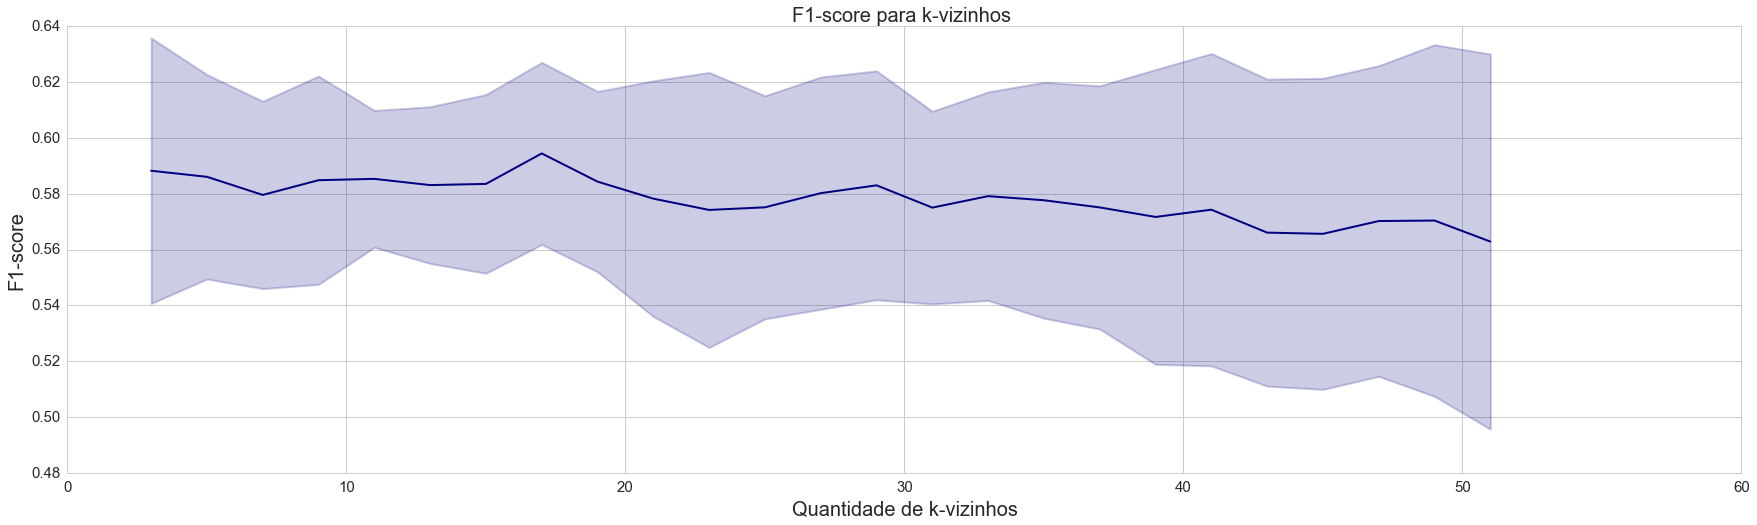

In [36]:
# Busca do melhor hiperparâmetro
validation_graph_f1(model=KNN(),X=conjunto2_train_desbalanceado,y=conjunto2_train_target_desbalanceado.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='f1',jobs=-1)

In [37]:
# acurácia no conjunto de teste
cross_val_desbal_f1_2 = cross_val_score(KNN(n_neighbors=3),conjunto2_test_desbalanceado,conjunto2_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_2)

[ 0.63013699  0.60240964  0.4         0.60869565  0.575       0.55555556
  0.57142857  0.55421687  0.56756757  0.67605634]


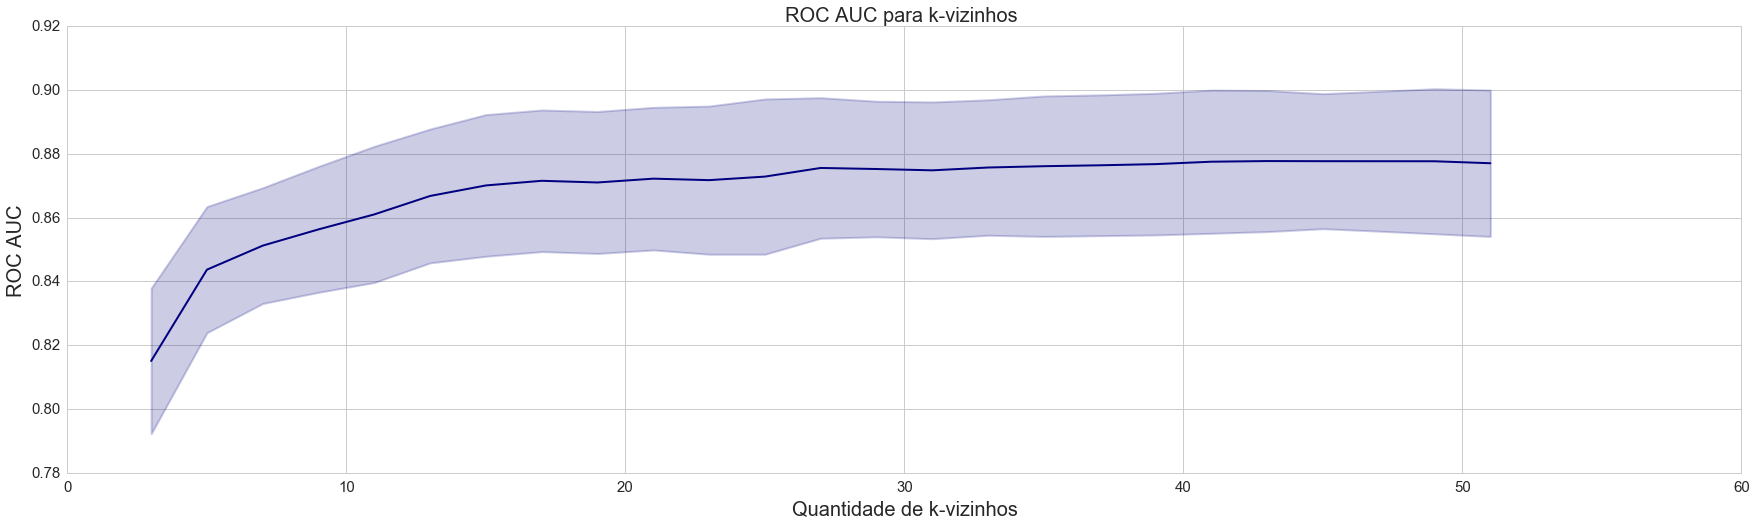

In [38]:
# Busca do melhor hiperparâmetro
validation_graph_roc(model=KNN(),X=conjunto2_train_desbalanceado,y=conjunto2_train_target_desbalanceado.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='roc_auc',jobs=-1)

In [39]:
# acurácia no conjunto de teste
cross_val_desbal_roc_2 = cross_val_score(KNN(n_neighbors=3),conjunto2_test_desbalanceado,conjunto2_test_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_2)

[ 0.80706692  0.79591411  0.75995414  0.81832395  0.79140395  0.80527533
  0.82261454  0.79077343  0.81697584  0.84156601]


### Dataset 3

O dataset 3 balanceado possui

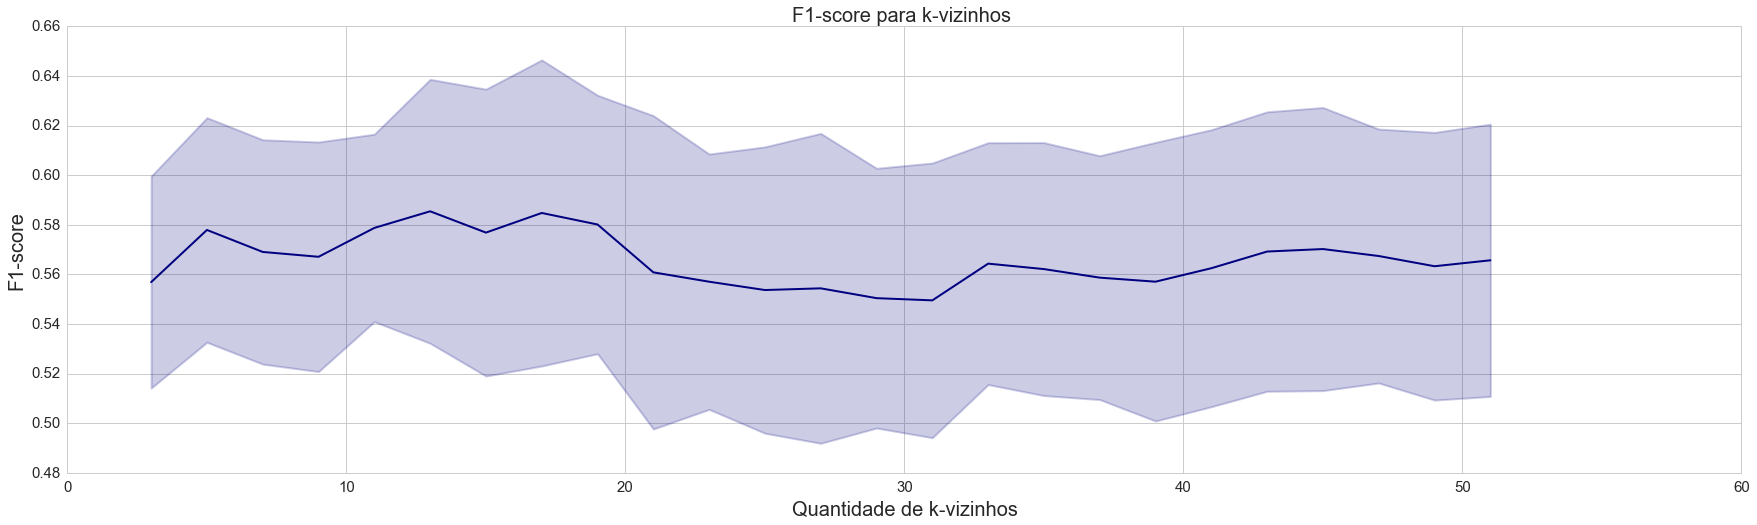

In [41]:
# Busca do melhor hiperparâmetro
validation_graph_f1(model=KNN(),X=conjunto3_train_desbalanceado,y=conjunto3_train_target_desbalanceado.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='f1',jobs=-1)

In [43]:
# acurácia no conjunto de teste
cross_val_desbal_f1_3 = cross_val_score(KNN(n_neighbors=3),conjunto3_test_desbalanceado,conjunto3_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_3)

[ 0.53125     0.57692308  0.56        0.5         0.6         0.54901961
  0.66666667  0.55172414  0.54901961  0.26666667]


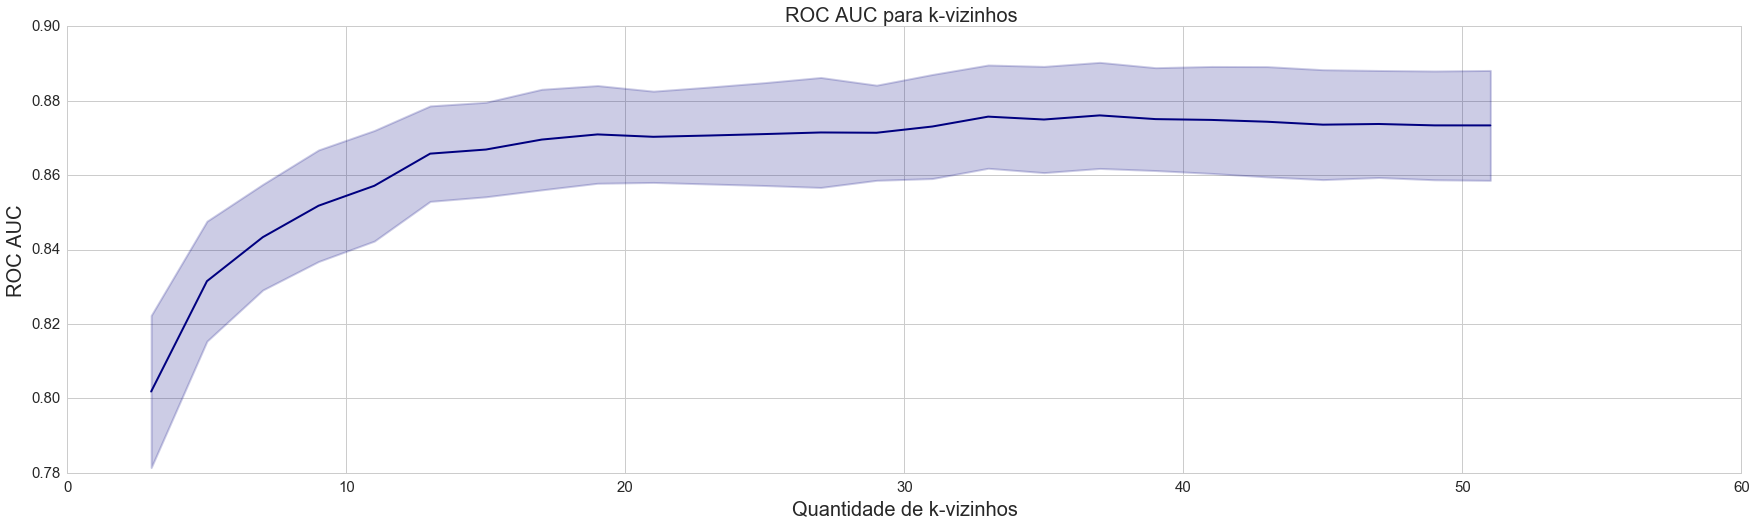

In [44]:
# Busca do melhor hiperparâmetro
validation_graph_roc(model=KNN(),X=conjunto3_train_desbalanceado,y=conjunto3_train_target_desbalanceado.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='roc_auc',jobs=-1)

In [46]:
# acurácia no conjunto de teste
cross_val_desbal_roc_3 = cross_val_score(KNN(n_neighbors=3),conjunto3_test_desbalanceado,conjunto3_test_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_3)

[ 0.82729885  0.81257432  0.8353151   0.75267539  0.85389417  0.83650416
  0.867717    0.87098692  0.86504162  0.7960761 ]


### Dataset 4

O dataset 4 balanceado possui

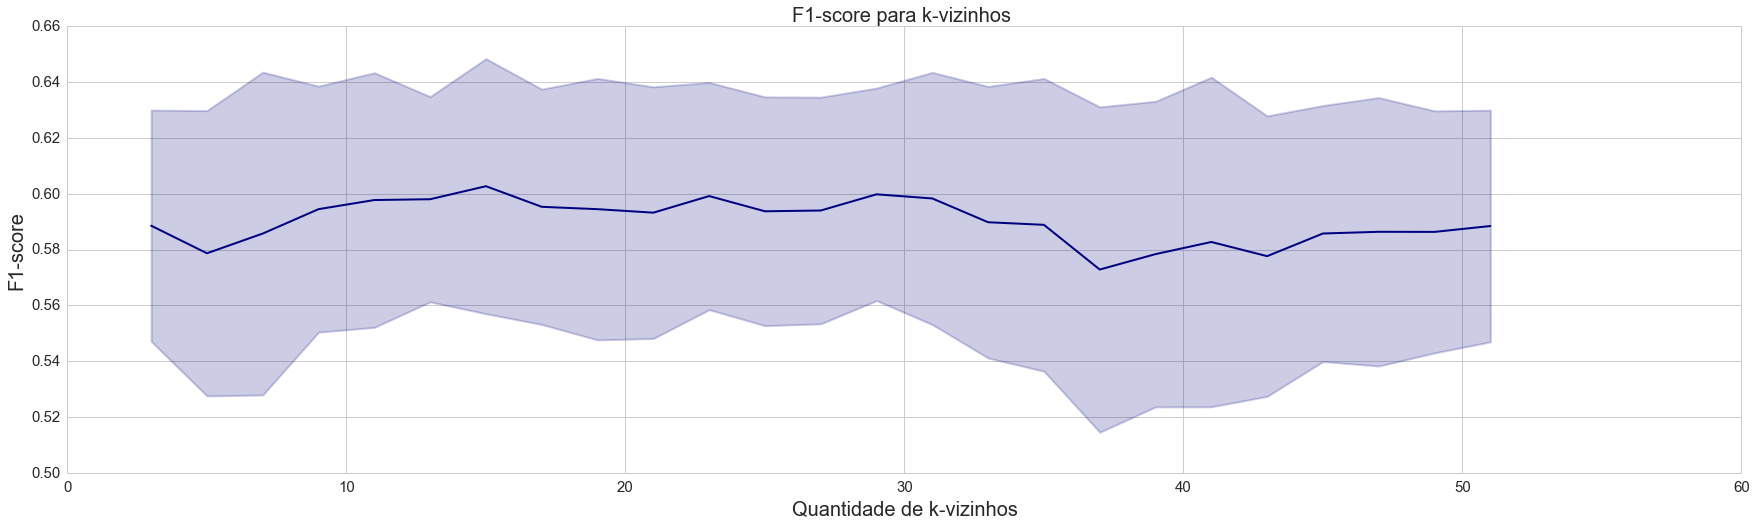

In [47]:
# Busca do melhor hiperparâmetro
validation_graph_f1(model=KNN(),X=conjunto4_train_desbalanceado,y=conjunto4_train_target_desbalanceado.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='f1',jobs=-1)

In [48]:
# acurácia no conjunto de teste
cross_val_desbal_f1_4 = cross_val_score(KNN(n_neighbors=3),conjunto4_test_desbalanceado,conjunto4_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_4)

[ 0.55172414  0.52830189  0.60377358  0.5         0.50909091  0.62745098
  0.5862069   0.5         0.6         0.51851852]


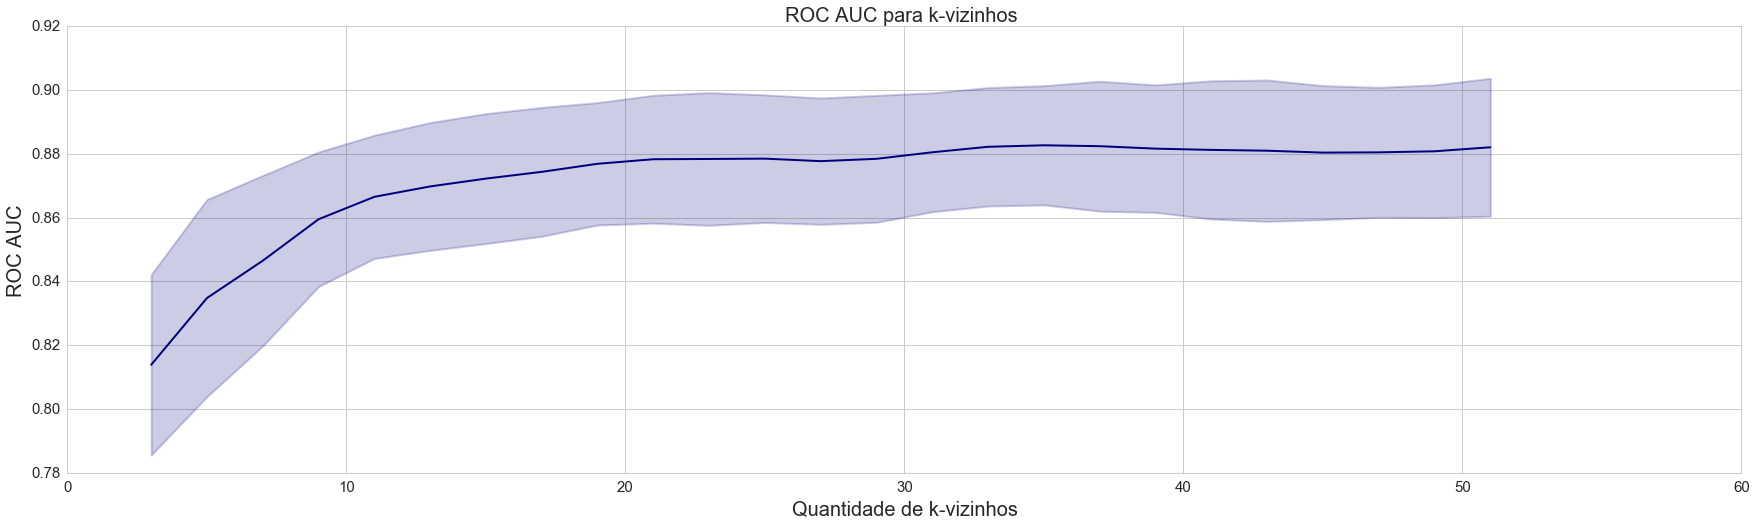

In [49]:
# Busca do melhor hiperparâmetro
validation_graph_roc(model=KNN(),X=conjunto4_train_desbalanceado,y=conjunto4_train_target_desbalanceado.earnings,hyperparameter='n_neighbors',
                 grid_search=list(range(3,53,2)),k_folds=10,score='roc_auc',jobs=-1)

In [50]:
# acurácia no conjunto de teste
cross_val_desbal_roc_4 = cross_val_score(KNN(n_neighbors=3),conjunto4_test_desbalanceado,conjunto4_test_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_4)

[ 0.78359652  0.76780535  0.83612633  0.73509507  0.72881083  0.8622301
  0.75652594  0.77489526  0.79197551  0.76699968]


### Avaliação dos modelos para cada cenário

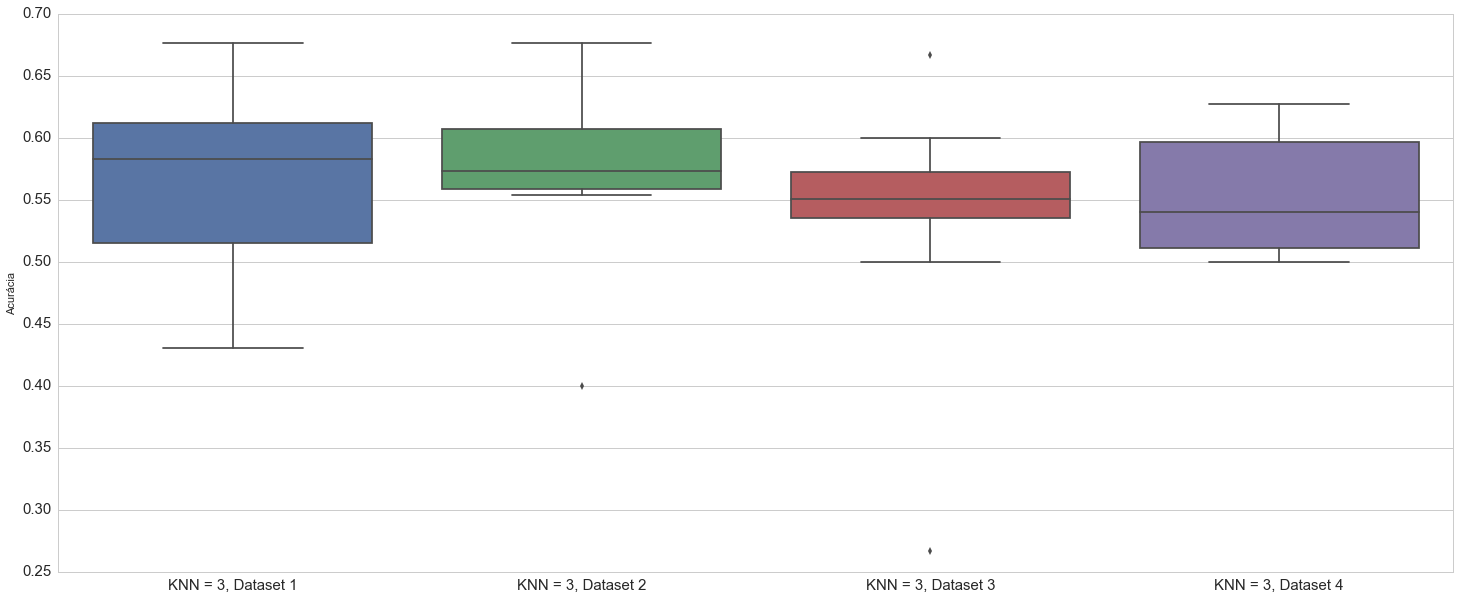

In [51]:
modelos_desbalanceados = [cross_val_desbal_f1_1, cross_val_desbal_f1_2, cross_val_desbal_f1_3, cross_val_desbal_f1_4]
labels = ['KNN = 3, Dataset 1', 'KNN = 3, Dataset 2', 'KNN = 3, Dataset 3', 'KNN = 3, Dataset 4']
plt.figure(figsize=(25,10))
sns.boxplot(data=modelos_desbalanceados)
plt.xticks(list(range(0,4)),labels,fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Acurácia')
plt.show()

Falar sobre acurácia e outliers!!! Com outliers, pontos distantes são difíceis de predizer, assim o método 3 foi bom! Escrever mais depois sobre...